## TMDB Box Office Prediction 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [5]:
print(train.shape)
print(test.shape)

(3000, 23)
(4398, 22)


In [6]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [7]:
test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482242,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [8]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [9]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [10]:
# converting the features in json format to nominl format
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [11]:
# dropping belongs_To_collection as most of it contains null
train.drop(['belongs_to_collection'], axis=1, inplace=True)
test.drop(['belongs_to_collection'], axis=1, inplace=True)

(array([1.49e+03, 3.96e+02, 2.11e+02, 2.20e+02, 9.40e+01, 1.28e+02,
        7.30e+01, 7.30e+01, 4.00e+01, 4.90e+01, 3.30e+01, 3.80e+01,
        1.00e+01, 3.10e+01, 1.10e+01, 1.40e+01, 7.00e+00, 1.40e+01,
        3.00e+00, 1.70e+01, 1.00e+00, 7.00e+00, 3.00e+00, 7.00e+00,
        2.00e+00, 5.00e+00, 7.00e+00, 2.00e+00, 1.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 5.00e+00, 0.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([0.000e+00, 7.600e+06, 1.520e+07, 2.280e+07, 3.040e+07, 3.800e+07,
        4.560e+07, 5.320e+07, 6.080e+07, 6.840e+07, 7.600e+07, 8.360e+07,
        9.120e+07, 9.880e+07, 1.064e+08, 1.140e+08, 1.216e+08, 1.292e+08,
        1.368e+08, 1.444e+08, 1.520e+08, 1.596e+08, 1.672e+08, 1.748e+08,
        1.824e+08, 1.900e+08, 1.976e+08, 2.052e+08, 2.128e+08, 2.204e+08,
        2.280e+08, 2.356e+08, 2.432e+08, 2.508e+08, 2.58

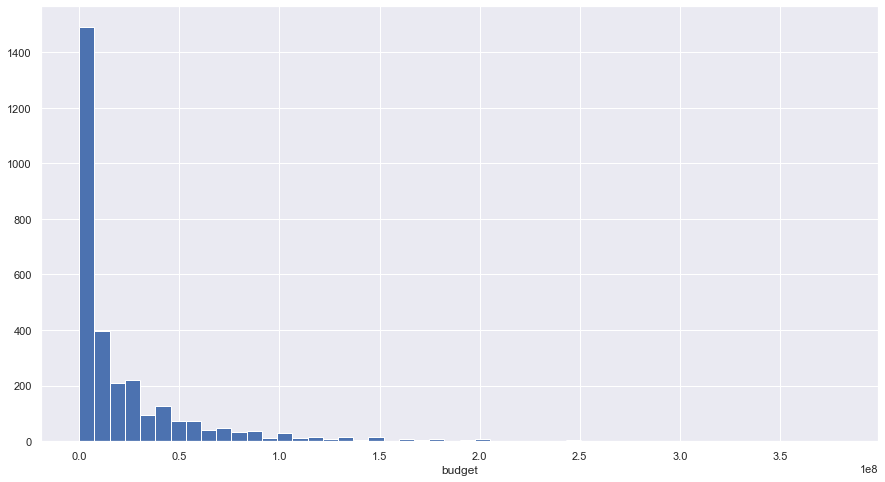

In [12]:
#budget
sns.set(rc = {'figure.figsize' : (15,8)})
plt.xlabel('budget')
plt.hist(train['budget'],bins = 50)

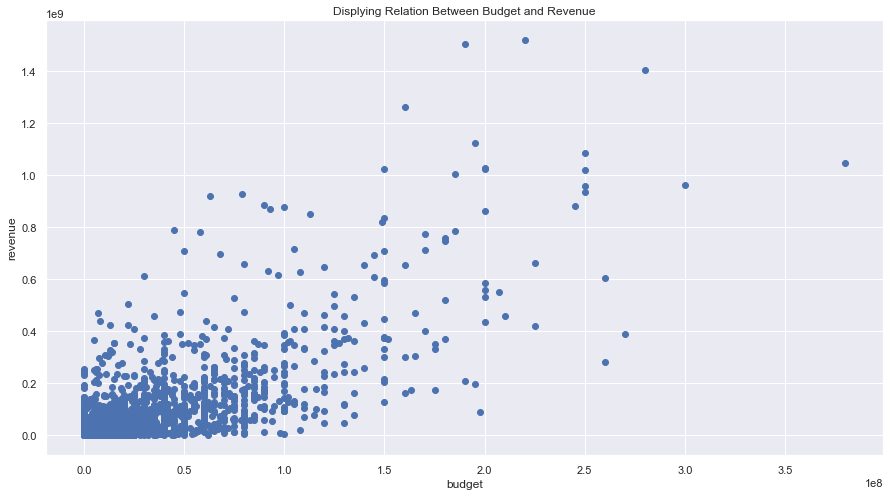

In [13]:
#relation between budget and revenue
plt.title('Displying Relation Between Budget and Revenue')
plt.xlabel('budget')
plt.ylabel('revenue')
plt.scatter(x=train['budget'], y=train['revenue'])

In [14]:
print(len(train[train['budget'] < 10000] ) )

835


In [15]:
# solve column budget becuse contain many movies have low budget

train = train[train['budget'] >= 100000]

In [16]:
#by using mean method
MEAN = train['budget'].mean()

train['budget']= train['budget'].apply(lambda x : x+MEAN if x<100000  else x)

In [17]:
#using log transform without removing low budgets to have better distribution

train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

(array([ 16.,   7.,  15.,  34.,  25.,  47.,  55.,  89., 127., 152., 154.,
        239., 264., 268., 211., 201., 143.,  64.,  34.,   6.]),
 array([11.51293546, 11.92507278, 12.3372101 , 12.74934742, 13.16148473,
        13.57362205, 13.98575937, 14.39789669, 14.810034  , 15.22217132,
        15.63430864, 16.04644596, 16.45858327, 16.87072059, 17.28285791,
        17.69499523, 18.10713254, 18.51926986, 18.93140718, 19.3435445 ,
        19.75568181]),
 <BarContainer object of 20 artists>)

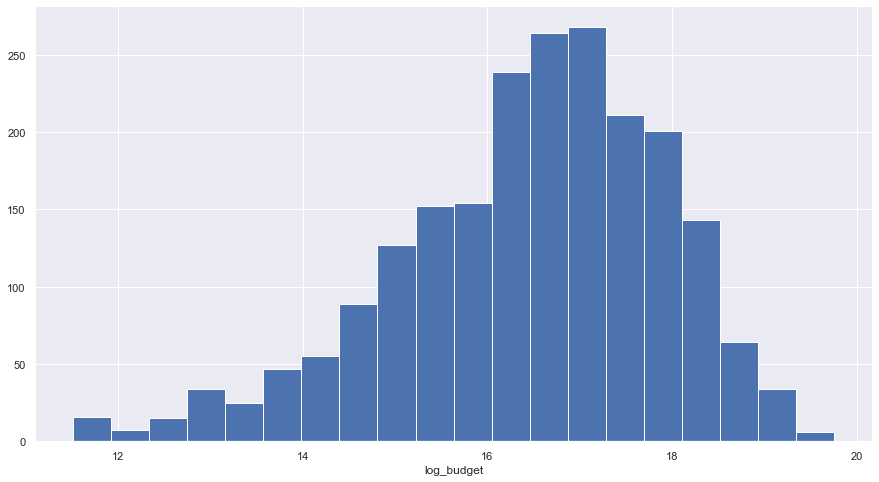

In [18]:
#using log Transform after removing budgets less than 10k$

plt.xlabel('log_budget')
plt.hist(train['log_budget'], bins=20)

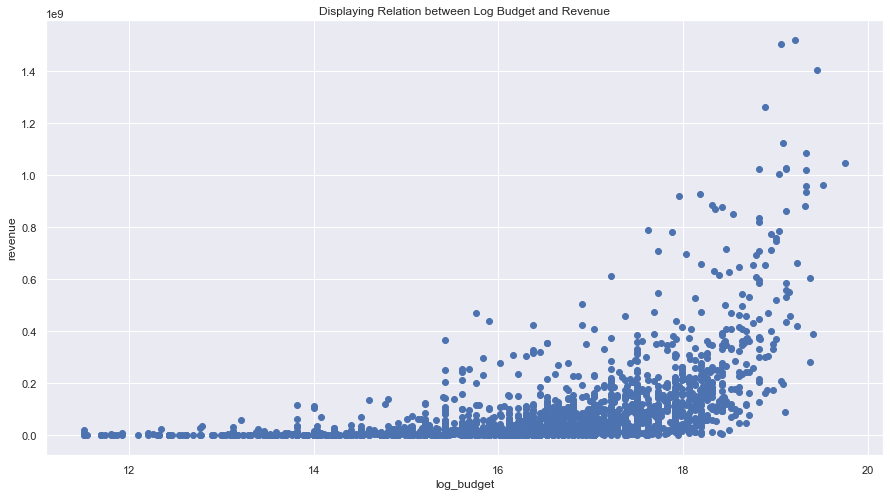

In [19]:
#relation between log budget and revenue
plt.title('Displaying Relation between Log Budget and Revenue')
plt.xlabel('log_budget')
plt.ylabel('revenue')
plt.scatter(x=train['log_budget'], y=train['revenue'])

In [20]:
print(len(train[train['budget'] < 50000] ) )

0


In [21]:
print(len(train[train['budget'] < 10000]))

0


In [22]:
train['budget'].describe()

count    2.151000e+03
mean     3.142419e+07
std      4.040687e+07
min      1.000000e+05
25%      6.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2151 non-null   int64  
 1   budget                2151 non-null   int64  
 2   genres                2146 non-null   object 
 3   homepage              764 non-null    object 
 4   imdb_id               2151 non-null   object 
 5   original_language     2151 non-null   object 
 6   original_title        2151 non-null   object 
 7   overview              2145 non-null   object 
 8   popularity            2151 non-null   float64
 9   poster_path           2151 non-null   object 
 10  production_companies  2084 non-null   object 
 11  production_countries  2133 non-null   object 
 12  release_date          2151 non-null   object 
 13  runtime               2150 non-null   float64
 14  spoken_languages      2145 non-null   object 
 15  status               

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4398 non-null   int64  
 1   budget                4398 non-null   int64  
 2   genres                4382 non-null   object 
 3   homepage              1420 non-null   object 
 4   imdb_id               4398 non-null   object 
 5   original_language     4398 non-null   object 
 6   original_title        4398 non-null   object 
 7   overview              4384 non-null   object 
 8   popularity            4398 non-null   float64
 9   poster_path           4397 non-null   object 
 10  production_companies  4140 non-null   object 
 11  production_countries  4296 non-null   object 
 12  release_date          4397 non-null   object 
 13  runtime               4394 non-null   float64
 14  spoken_languages      4356 non-null   object 
 15  status               

In [26]:
test.loc[test['release_date'].isnull()==True, 'release_date'] = '5/1/00'
test[test["release_date"]=='5/1/00']

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,log_budget
828,3829,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,NaN,...,5/1/00,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN,0.00000
1731,4732,103000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0172495,en,Gladiator,"In the year 180, the death of emperor Marcus A...",23.186667,/6WBIzCgmDCYrqh64yDREGeDk9d3.jpg,...,5/1/00,155.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Hero Will Rise.,Gladiator,"[{'id': 588, 'name': 'rome'}, {'id': 1394, 'na...","[{'cast_id': 8, 'character': 'Maximus', 'credi...","[{'credit_id': '52fe4217c3a36847f800340d', 'de...",18.45024


In [27]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df.head()

,id,revenue
0,3001,1000000
1,3002,1000000
2,3003,1000000
3,3004,1000000
4,3005,1000000


In [28]:
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       4398 non-null   int64
 1   revenue  4398 non-null   int64
dtypes: int64(2)
memory usage: 68.8 KB


In [29]:
train['release_date'] = pd.to_datetime(train['release_date'],format='%m/%d/%y')
test['release_date'] = pd.to_datetime(test['release_date'],format='%m/%d/%y')

In [31]:
#train
train["release_year"] = pd.to_datetime(train["release_date"]).dt.year.astype(int)
train["release_day"] = pd.to_datetime(train["release_date"]).dt.dayofweek.astype(int)
train["release_month"] = pd.to_datetime(train["release_date"]).dt.month.astype(int)

#test
test["release_year"] = pd.to_datetime(test["release_date"]).dt.year.astype(int)
test["release_day"] = pd.to_datetime(test["release_date"]).dt.dayofweek.astype(int)
test["release_month"] = pd.to_datetime(test["release_date"]).dt.month.astype(int)

In [32]:
train['release_year'].max()

2068

In [33]:
train['release_year'] = train['release_year'].apply(lambda x : (x - 100) if x > 2019 else x)
test['release_year'] = test['release_year'].apply(lambda x : (x - 100) if x > 2019 else x)

In [34]:
train['genres'] = train['genres'].fillna("none")
train['original_language'] = train['original_language'].fillna("none")
train['spoken_languages'] = train['spoken_languages'].fillna("none")
train['status'] = train['status'].fillna("none")
train['production_countries'] = train['production_countries'].fillna("none")

test['genres'] = test['genres'].fillna("none")
test['original_language'] = test['original_language'].fillna("none")
test['spoken_languages'] = test['spoken_languages'].fillna("none")
test['status'] = test['status'].fillna("none")
test['production_countries'] = test['production_countries'].fillna("none")
test['production_companies'] = test['production_companies'].fillna("none")

In [35]:
train.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,tagline,title,Keywords,cast,crew,revenue,log_budget,release_year,release_day,release_month
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,2015,4,2
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,2004,4,8
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,2014,4,10
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,2012,4,3
5,6,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,1987,3,8


In [36]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [37]:
from sklearn import preprocessing
train.genres = train.genres.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.spoken_languages = train.spoken_languages.map(lambda x : sorted([d['iso_639_1'] for d in get_dictionary(x)])).map(lambda x : ','.join(map(str, x)))
train.production_companies = train.production_companies.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x : ','.join(map(str, x)))
train.production_countries = train.production_countries.map(lambda x : sorted([d['iso_3166_1'] for d in get_dictionary(x)])).map(lambda x : ','.join(map(str, x)))

In [38]:
test.genres = test.genres.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.spoken_languages = test.spoken_languages.map(lambda x: sorted([d['iso_639_1'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.production_companies = test.production_companies.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.production_countries = test.production_countries.map(lambda x: sorted([d['iso_3166_1'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
for c in ['genres', 'production_companies', 'production_countries', 'spoken_languages']:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[c].fillna('').astype(str)) + list(test[c].fillna('').astype(str)))
    train[c] = lbl.transform(train[c].fillna(''))
    test[c] = lbl.transform(test[c].fillna(''))
    print(c, len(lbl.classes_))

genres 770
production_companies 4959
production_countries 500
spoken_languages 563


In [39]:
# Simple encoding
train['status'] = train['status'].astype('category')
train['status'] = train['status'].cat.codes
test['status'] = test['status'].astype('category')
test['status'] = test['status'].cat.codes

train['original_language'] = train['original_language'].astype('category')
train['original_language'] = train['original_language'].cat.codes
test['original_language'] = test['original_language'].astype('category')
test['original_language'] = test['original_language'].cat.codes

# Replacing 0 Budget values with the median value
train['budget']= train['budget'].replace(0, train['budget'].median())
test['budget']= test['budget'].replace(0, test['budget'].median())

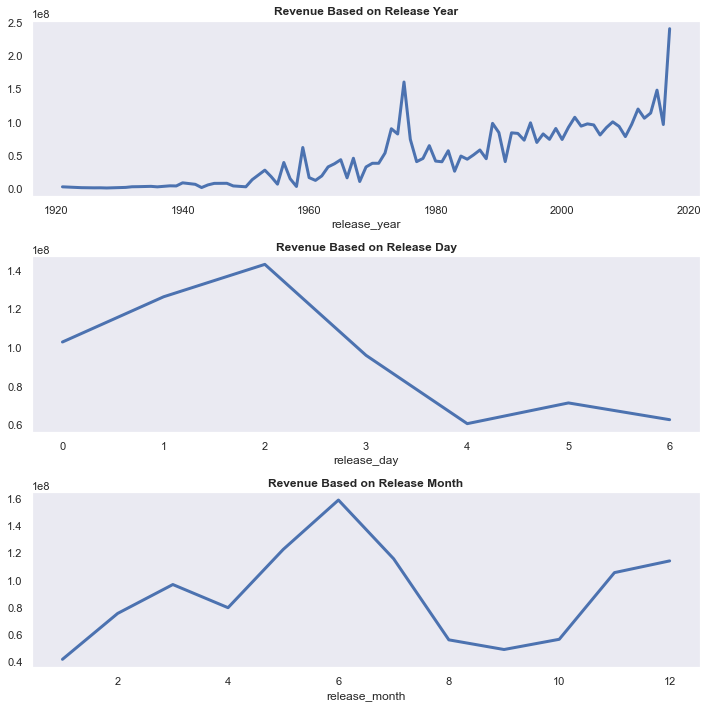

In [40]:
fig, ax = plt.subplots(3, 1, tight_layout=True)
plt.grid()

train.groupby('release_year')['revenue'].mean().plot(ax=ax[0], figsize=(10, 10), linewidth=3).set_title('Revenue Based on Release Year', fontweight="bold")
ax[0].grid()

train.groupby('release_day')['revenue'].mean().plot(ax=ax[1], figsize=(10, 10), linewidth=3).set_title('Revenue Based on Release Day', fontweight="bold")
ax[1].grid()

train.groupby('release_month')['revenue'].mean().plot(ax=ax[2], figsize=(10, 10), linewidth=3).set_title('Revenue Based on Release Month', fontweight="bold")
ax[2].grid()


fig.tight_layout(pad=2.0)
plt.show()

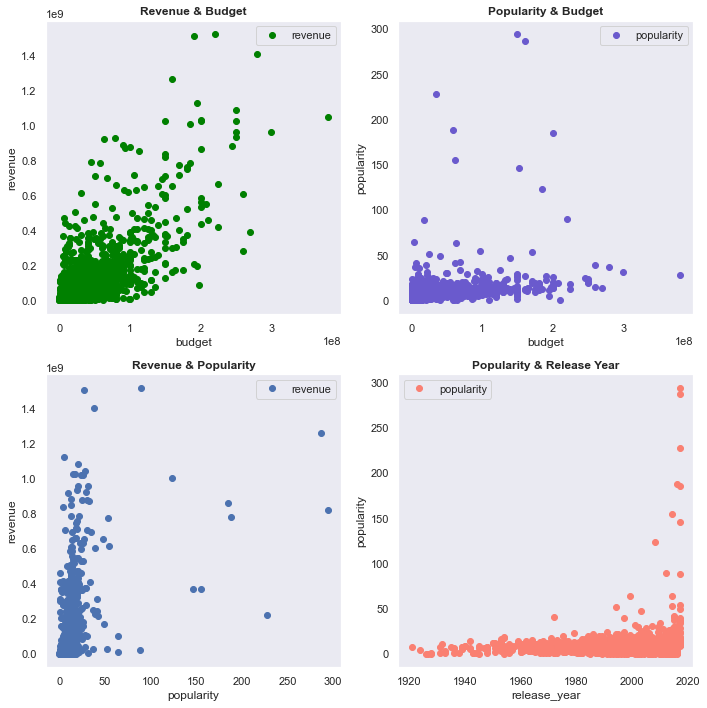

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), tight_layout=True)

train.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='green').set_title('Revenue & Budget', fontweight="bold")
ax[0][0].grid()

train.plot(ax=ax[1][0], x='popularity', y='revenue', style='o', ylabel= 'revenue').set_title('Revenue & Popularity', fontweight="bold")
ax[1][0].grid()

train.plot(ax=ax[0][1], x='budget', y='popularity', style='o', ylabel= 'popularity', color='slateblue').set_title('Popularity & Budget', fontweight="bold")
ax[0][1].grid()

train.plot(ax=ax[1][1], x='release_year', y='popularity', style='o', ylabel= 'popularity', color='salmon').set_title('Popularity & Release Year', fontweight="bold")
ax[1][1].grid()

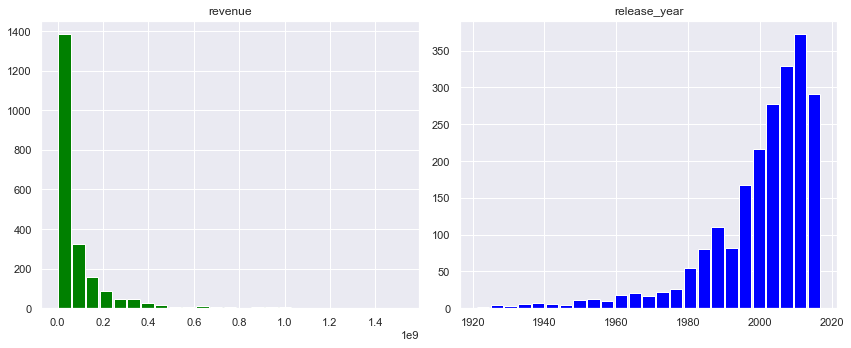

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

train.hist(ax=ax[0], column='revenue', bins=25, grid=False, figsize=(8,5), color='green', zorder=2, rwidth=0.9)
ax[0].grid()

train.hist(ax=ax[1], column='release_year', bins=25, grid=False, figsize=(8,5), color='blue', zorder=2, rwidth=0.9)
ax[1].grid()

Text(0.5, 1.0, 'Boxplot of Popularity')

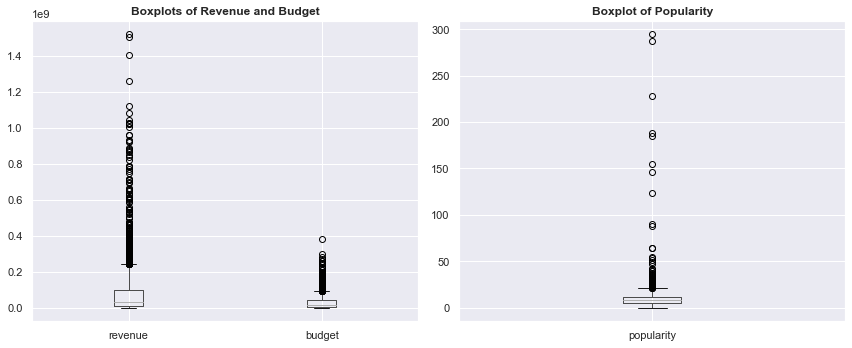

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

train.boxplot(ax=ax[0], column=['revenue', 'budget']).set_title('Boxplots of Revenue and Budget', fontweight="bold") 
train.boxplot(ax=ax[1], column=['popularity']).set_title('Boxplot of Popularity', fontweight="bold") 

In [44]:
train.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,tagline,title,Keywords,cast,crew,revenue,log_budget,release_year,release_day,release_month
0,1,14000000,689,NaN,tt2637294,4,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,2015,4,2
1,2,40000000,498,NaN,tt0368933,4,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,2004,4,8
2,3,3300000,407,http://sonyclassics.com/whiplash/,tt2582802,4,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,2014,4,10
3,4,1200000,550,http://kahaanithefilm.com/,tt1821480,10,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,2012,4,3
5,6,8000000,91,NaN,tt0093743,4,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,1987,3,8


In [45]:
train.production_countries

0       497
1       497
2       497
3       430
5         0
       ... 
2992    497
2993    497
2997    497
2998    497
2999    497
Name: production_countries, Length: 2151, dtype: int32

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2151 non-null   int64         
 1   budget                2151 non-null   int64         
 2   genres                2151 non-null   int32         
 3   homepage              764 non-null    object        
 4   imdb_id               2151 non-null   object        
 5   original_language     2151 non-null   int8          
 6   original_title        2151 non-null   object        
 7   overview              2145 non-null   object        
 8   popularity            2151 non-null   float64       
 9   poster_path           2151 non-null   object        
 10  production_companies  2151 non-null   int32         
 11  production_countries  2151 non-null   int32         
 12  release_date          2151 non-null   datetime64[ns]
 13  runtime           

In [47]:
#genres

j = 0
train['genre_Count'] = 0
for i in train['genres']:
    d = get_dict(i)
    if d != {}:
        train['genre_Count'][j] = len(d)
    else:
        train['genre_Count'][j] = 0
    j += 1
    
j = 0
test['genre_Count'] = 0
for i in test['genres']:
    d = get_dict(i)
    if d != {}:
        test['genre_Count'][j] = len(d)
    else:
        test['genre_Count'][j] = 0
    j += 1

train.drop(['genres'], axis=1, inplace=True)
test.drop(['genres'], axis=1, inplace=True)
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,title,Keywords,cast,crew,revenue,log_budget,release_year,release_day,release_month,genre_Count
0,1,14000000,NaN,tt2637294,4,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2855,...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,2015,4,2,0
1,2,40000000,NaN,tt0368933,4,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,1091,...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,2004,4,8,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,4,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,1319,...,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,2014,4,10,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,10,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,0,...,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,2012,4,3,0
5,6,8000000,NaN,tt0093743,4,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,0,...,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,1987,3,8,0


In [48]:
#homepage
train.drop(['homepage'], axis=1, inplace=True)
test.drop(['homepage'], axis=1, inplace=True)

In [49]:
#imdb_id
train.drop(['imdb_id'], axis=1, inplace=True)
test.drop(['imdb_id'], axis=1, inplace=True)

In [50]:
#original_language
for i, e in enumerate(train['original_language'][:5]):
    print(i, e)

0 4
1 4
2 4
3 10
4 4


<AxesSubplot:xlabel='original_language', ylabel='count'>

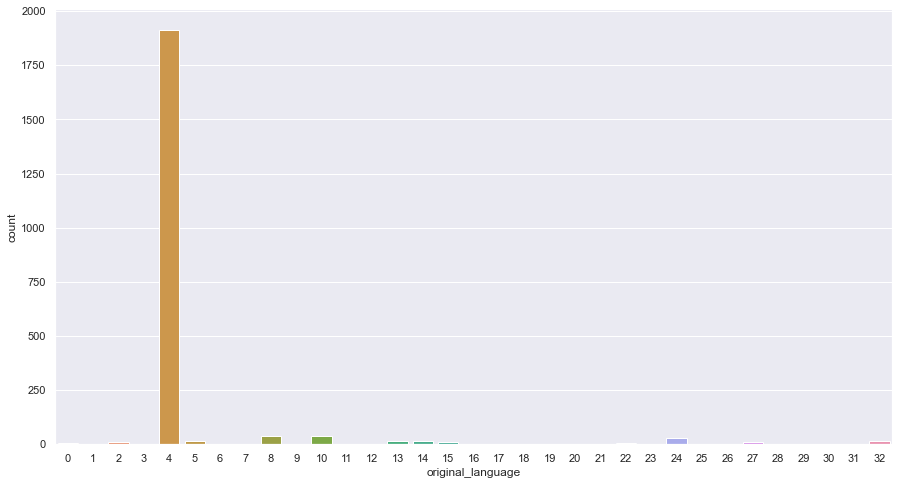

In [51]:
sns.set(rc = {'figure.figsize' :(15, 8)})
sns.countplot(train['original_language'].sort_values())

In [52]:
for i in train['original_language']:
    if(i=='en'):
        train['Has_En']=1
    else:
        train['Has_En']=0
for i in test['original_language']:
    if(i=='en'):
        test['Has_En']=1
    else:
        test['Has_En']=0
        
train.head()

,id,budget,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,...,Keywords,cast,crew,revenue,log_budget,release_year,release_day,release_month,genre_Count,Has_En
0,1,14000000,4,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2855,497,2015-02-20,...,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,2015,4,2,0,0
1,2,40000000,4,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,1091,497,2004-08-06,...,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,2004,4,8,0,0
2,3,3300000,4,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,1319,497,2014-10-10,...,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,2014,4,10,0,0
3,4,1200000,10,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,0,430,2012-03-09,...,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,2012,4,3,0,0
5,6,8000000,4,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,0,0,1987-08-06,...,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,1987,3,8,0,0


In [53]:
#dropping the column from datasets(train, test)
train.drop(['original_language'], axis=1, inplace=True)
test.drop(['original_language'], axis=1, inplace=True)

In [54]:
#original_title & overview
train.drop(['original_title' , 'overview'], axis=1, inplace=True)
test.drop(['original_title','overview'], axis=1, inplace=True)

In [55]:
#popularity
train['popularity'].isnull().sum()

0

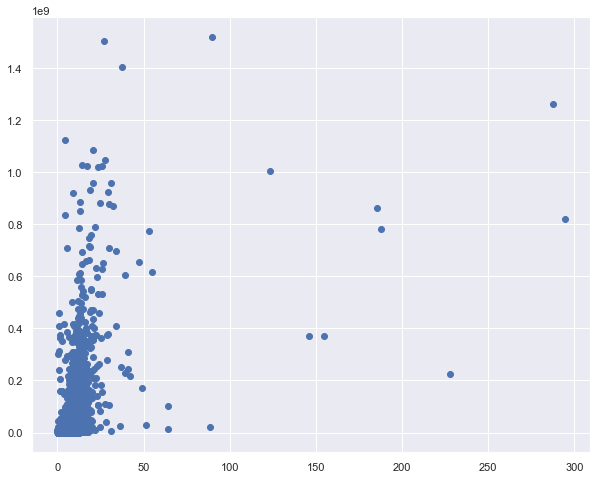

In [56]:
sns.set(rc={'figure.figsize' :(10,8)})
plt.scatter('popularity','revenue', data=train)
plt.show()

In [57]:
#dropping poster_path
train.drop(['poster_path'], axis=1, inplace=True)
test.drop(['poster_path'], axis=1, inplace=True)

In [58]:
#production_companies

for i,e in enumerate(train["production_companies"][:5]) :
    print(i,e)

0 2855
1 1091
2 1319
3 0
4 0


In [59]:
num_production_companies=pd.DataFrame(columns=['num_production_companies'])
train=pd.concat([train, num_production_companies], axis=1)
test=pd.concat([test, num_production_companies], axis=1)

In [60]:
j=0
for i in train["production_companies"]:
    d=get_dict(i)
    if len(d)!=0:
        train['num_production_companies'][j]=len(d)
    else:
        train['num_production_companies'][j]=np.NaN
    j+=1

j=0
for i in test["production_companies"]:
    d=get_dict(i)
    if len(d)!=0:
        test['num_production_companies'][j]=len(d)
    else:
        test['num_production_companies'][j]=np.NaN
    j+=1

In [61]:
#dropping production_companies from both datasets
train.drop(['production_companies'], axis=1, inplace=True)
test.drop(['production_companies'], axis=1, inplace=True)

In [62]:
train['num_production_companies']

0       NaN
1       NaN
2       NaN
3       NaN
5       NaN
       ... 
2992    NaN
2993    NaN
2997    NaN
2998    NaN
2999    NaN
Name: num_production_companies, Length: 2151, dtype: object

In [64]:
train["num_production_companies"].isnull().sum()

2151

In [65]:
train['num_production_companies'] = train['num_production_companies'].fillna(train['num_production_companies'].mean()).round()
test['num_production_companies'] = train['num_production_companies'].fillna(test['num_production_companies'].mean()).round()

In [66]:
#production_countries

for i,e in enumerate(train["production_countries"][:5]):
    print(i,e)

0 497
1 497
2 497
3 430
4 0


In [67]:
production_countries=pd.DataFrame(columns=["production_countries"])
train=pd.concat([train,production_countries], axis=1)
test=pd.concat([test,production_countries], axis=1)

In [68]:
j = 0
for i in train['production_countries']:
    d = get_dict(i)
    if len(d)!=0:
        if len(d) > 1:
            countires = []
            for k in range(len(d)):
                countires.append(d[k]['name'])
            if 'United States of America' in countires:
                train['production_countries'][j] = 'United States of America'
        else:
            train['production_countries'][j] = d[0]['name']
    else:
        train['production_countries'][j] = np.NaN
    j += 1
    
j = 0
for i in test['production_countries']:
    d = get_dict(i)
    if len(d)!=0:
        if len(d) > 1:
            countires = []
            for k in range(len(d)):
                countires.append(d[k]['name'])
            if 'United States of America' in countires:
                test['production_countries'][j] = 'United States of America'
        else:
            test['production_countries'][j] = d[0]['name']
    else:
        test['production_countries'][j] = np.NaN
    j += 1

In [69]:
is_use_prediction = pd.DataFrame(columns=["is_use_prediction"])
train=pd.concat([train, is_use_prediction], axis=1)
test=pd.concat([test, is_use_prediction], axis=1)

In [70]:
j=0
for i in train["production_countries"]:
    if i=='United States of America':
        train['is_use_prediction'][j]=1
    elif str(i)=='NaN':
        train['is_use_prediction'][j]=np.NaN
    else:
        train['is_use_prediction'][j]=0
    j+=1
j=0
for i in test["production_countries"]:
    if i=='United States of America':
        test['is_use_prediction'][j]=1
    elif str(i)=='NaN':
        test['is_use_prediction'][j]=np.NaN
    else:
        test['is_use_prediction'][j]=0
    j+=1

In [71]:
train.drop(['production_countries', 'production_countries'], axis=1, inplace=True)
test.drop(['production_countries', 'production_countries'], axis=1, inplace=True)

In [72]:
train['is_use_prediction'].isnull().sum()

2151

In [73]:
train.head()

,id,budget,popularity,release_date,runtime,spoken_languages,status,tagline,title,Keywords,...,crew,revenue,log_budget,release_year,release_day,release_month,genre_Count,Has_En,num_production_companies,is_use_prediction
0,1,14000000,6.575393,2015-02-20,93.0,282,0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,2015,4,2,0,0,NaN,NaN
1,2,40000000,8.248895,2004-08-06,113.0,282,0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,2004,4,8,0,0,NaN,NaN
2,3,3300000,64.299990,2014-10-10,105.0,282,0,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",...,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,2014,4,10,0,0,NaN,NaN
3,4,1200000,3.174936,2012-03-09,122.0,392,0,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",...,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,2012,4,3,0,0,NaN,NaN
5,6,8000000,0.743274,1987-08-06,83.0,282,0,NaN,Pinocchio and the Emperor of the Night,NaN,...,"[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,1987,3,8,0,0,NaN,NaN


In [74]:
#release_data
test.loc[test['release_date'].isnull()==True,'release_date'] = '5/1/00'
test[test["release_date"]== '5/1/00']

,id,budget,popularity,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,log_budget,release_year,release_day,release_month,genre_Count,Has_En,num_production_companies,is_use_prediction
828,3829,7450000,0.009057,2000-05-01,90.0,0,3,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN,0.00000,2000,0,5,0,0,NaN,NaN
1731,4732,103000000,23.186667,2000-05-01,155.0,282,1,A Hero Will Rise.,Gladiator,"[{'id': 588, 'name': 'rome'}, {'id': 1394, 'na...","[{'cast_id': 8, 'character': 'Maximus', 'credi...","[{'credit_id': '52fe4217c3a36847f800340d', 'de...",18.45024,2000,0,5,0,0,NaN,NaN


In [75]:
train['release_date'] = pd.to_datetime(train['release_date'], format='%m/%d/%y')
test['release_date'] = pd.to_datetime(test['release_date'], format='%m/%d/%y')
train["release_year"] = pd.to_datetime(train["release_date"]).dt.year.astype(int)
train["release_day"] = pd.to_datetime(train["release_date"]).dt.dayofweek.astype(int)
train["release_month"] = pd.to_datetime(train["release_date"]).dt.month.astype(int)
test["release_year"] = pd.to_datetime(test["release_date"]).dt.year.astype(int)
test["release_day"] = pd.to_datetime(test["release_date"]).dt.dayofweek.astype(int)
test["release_month"] = pd.to_datetime(test["release_date"]).dt.month.astype(int)

In [76]:
#Since this competition was in 2019, there shouldn't be a release that after 2019
train['release_year'].max()

2068

In [77]:
#fixing the dates
def fix_date(x):
    if x > 2019:
        return x - 100
    else:
        return x
    
train['release_year'] = train['release_year'].apply(lambda x: fix_date(x))
test['release_year'] = test['release_year'].apply(lambda x: fix_date(x))

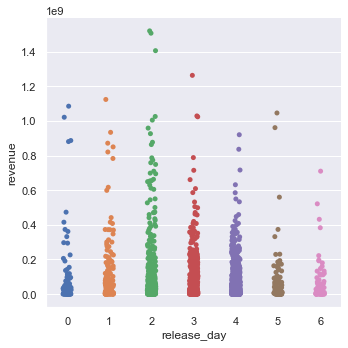

In [78]:
sns.catplot(x='release_day',y='revenue',data=train)

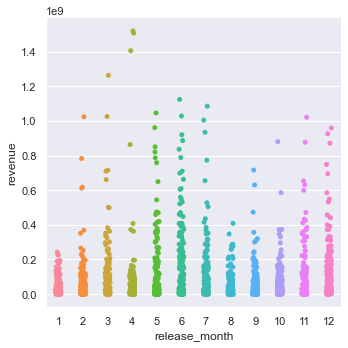

In [79]:
sns.catplot(x='release_month',y='revenue',data=train)

(array([  6.,  16.,  15.,  29.,  44.,  60., 189., 306., 660., 826.]),
 array([1921. , 1930.6, 1940.2, 1949.8, 1959.4, 1969. , 1978.6, 1988.2,
        1997.8, 2007.4, 2017. ]),
 <BarContainer object of 10 artists>)

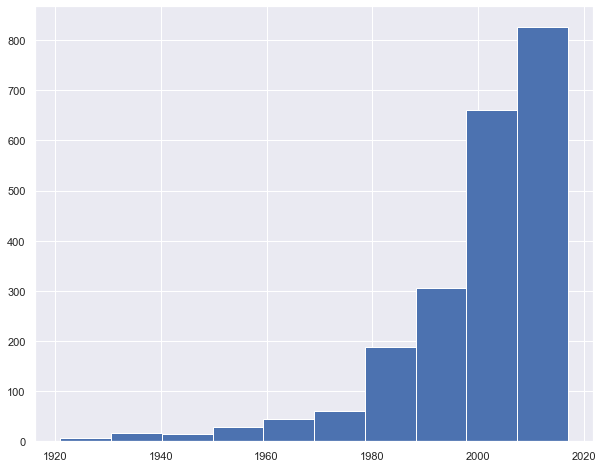

In [80]:
plt.hist('release_year', data=train)

In [81]:
#runtime
for i,e in enumerate(train['runtime'][:5]):
    print(i,e)

0 93.0
1 113.0
2 105.0
3 122.0
4 83.0


In [82]:
#checking
train['runtime'].isnull().sum()

1

In [83]:
train['runtime'] = train['runtime'].fillna(train['runtime'].mean()).round()
test['runtime'] = train['runtime'].fillna(train['runtime'].mean()).round()
train['runtime'].isnull().sum()

0

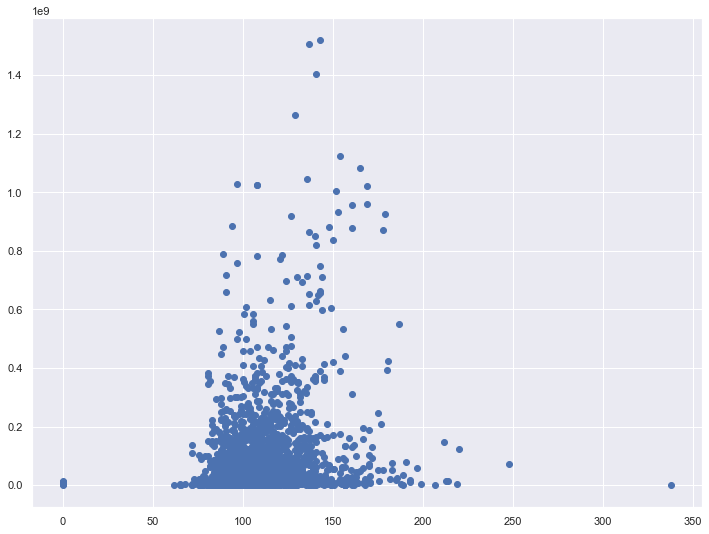

In [84]:
plt.subplots(figsize=(12,9))
plt.scatter('runtime', 'revenue', data=train)

In [85]:
#spoken_languages
for i,e in enumerate(train['spoken_languages'][:5]):
    print(i,e)

0 282
1 282
2 282
3 392
4 282


In [86]:
number_of_spoken_languages = pd.DataFrame(columns=['number_of_spoken_languages'])
train = pd.concat([train, number_of_spoken_languages], axis=1)
test = pd.concat([test, number_of_spoken_languages], axis=1)

In [87]:
j = 0
for i in train['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        train['number_of_spoken_languages'][j] = len(d)
    else:
        train['number_of_spoken_languages'][j] = np.NaN
    j += 1
    
j = 0
for i in test['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        test['number_of_spoken_languages'][j] = len(d)
    else:
        test['number_of_spoken_languages'][j] = np.NaN
    j += 1

In [88]:
train["number_of_spoken_languages"].isnull().sum()

2151

In [89]:
train['number_of_spoken_languages']=train['number_of_spoken_languages'].fillna(train['number_of_spoken_languages'].mean()).round()
test['number_of_spoken_languages']=test['number_of_spoken_languages'].fillna(test['number_of_spoken_languages'].mean()).round()

In [90]:
#dropping spoken_languages
train.drop(['spoken_languages'], axis=1, inplace=True)
test.drop(['spoken_languages'], axis=1, inplace=True)

In [91]:
train.head()

,id,budget,popularity,release_date,runtime,status,tagline,title,Keywords,cast,...,revenue,log_budget,release_year,release_day,release_month,genre_Count,Has_En,num_production_companies,is_use_prediction,number_of_spoken_languages
0,1,14000000,6.575393,2015-02-20,93.0,0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...",...,12314651,16.454568,2015,4,2,0,0,NaN,NaN,NaN
1,2,40000000,8.248895,2004-08-06,113.0,0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...",...,95149435,17.504390,2004,4,8,0,0,NaN,NaN,NaN
2,3,3300000,64.299990,2014-10-10,105.0,0,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...",...,13092000,15.009433,2014,4,10,0,0,NaN,NaN,NaN
3,4,1200000,3.174936,2012-03-09,122.0,0,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",...,16000000,13.997833,2012,4,3,0,0,NaN,NaN,NaN
5,6,8000000,0.743274,1987-08-06,83.0,0,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...",...,3261638,15.894952,1987,3,8,0,0,NaN,NaN,NaN


In [92]:
#status
train['status'].value_counts()
test['status'].value_counts()

1    4389
0       5
2       2
3       2
Name: status, dtype: int64

In [93]:
status=pd.DataFrame(columns=["Status"])
train=pd.concat([train, status], axis=1)
test=pd.concat([test, status], axis=1)

In [94]:
j=0
for i in train["status"]:
    if i=='Released':
        train['Status'][j]=1
    elif str(i)=='NaN':
        train['Status'][j]=np.NaN
    else:
        train['Status'][j]=0
    j+=1
j=0
for i in test["status"]:
    if i=='Released':
        test['Status'][j]=1
    elif str(i)=='NaN':
        test['Status'][j]=np.NaN
    else:
        test['Status'][j]=0
    j+=1

this feature is not useful most of them are already released

In [95]:
train.drop(['status'], axis=1, inplace=True)
test.drop(['status'], axis=1, inplace=True)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

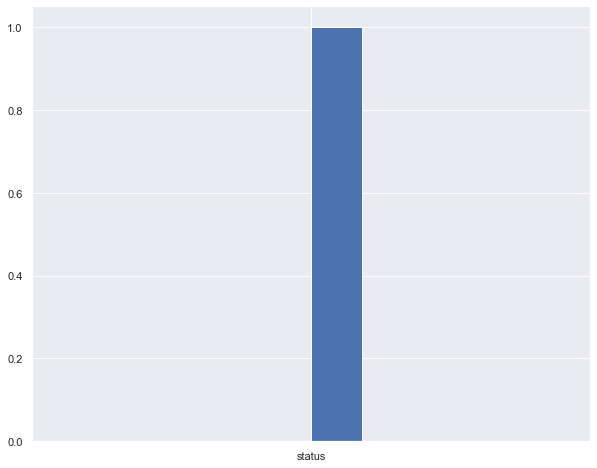

In [96]:
plt.hist(x="status", data=train)

(array([1.789e+03, 2.120e+02, 7.900e+01, 2.400e+01, 1.800e+01, 1.200e+01,
        1.100e+01, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([3.00000000e+00, 1.51955794e+08, 3.03911584e+08, 4.55867375e+08,
        6.07823166e+08, 7.59778956e+08, 9.11734747e+08, 1.06369054e+09,
        1.21564633e+09, 1.36760212e+09, 1.51955791e+09]),
 <BarContainer object of 10 artists>)

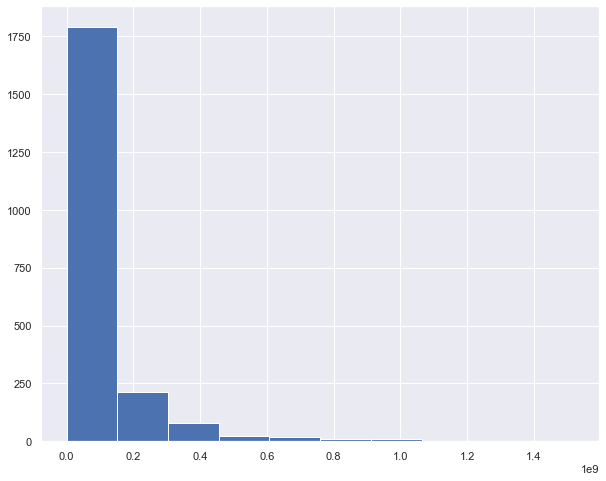

In [97]:
plt.hist(x="revenue", data=train)

In [98]:
train.head()

,id,budget,popularity,release_date,runtime,tagline,title,Keywords,cast,crew,...,log_budget,release_year,release_day,release_month,genre_Count,Has_En,num_production_companies,is_use_prediction,number_of_spoken_languages,Status
0,1,14000000,6.575393,2015-02-20,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",...,16.454568,2015,4,2,0,0,NaN,NaN,NaN,0
1,2,40000000,8.248895,2004-08-06,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",...,17.504390,2004,4,8,0,0,NaN,NaN,NaN,0
2,3,3300000,64.299990,2014-10-10,105.0,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",...,15.009433,2014,4,10,0,0,NaN,NaN,NaN,0
3,4,1200000,3.174936,2012-03-09,122.0,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",...,13.997833,2012,4,3,0,0,NaN,NaN,NaN,0
5,6,8000000,0.743274,1987-08-06,83.0,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",...,15.894952,1987,3,8,0,0,NaN,NaN,NaN,0


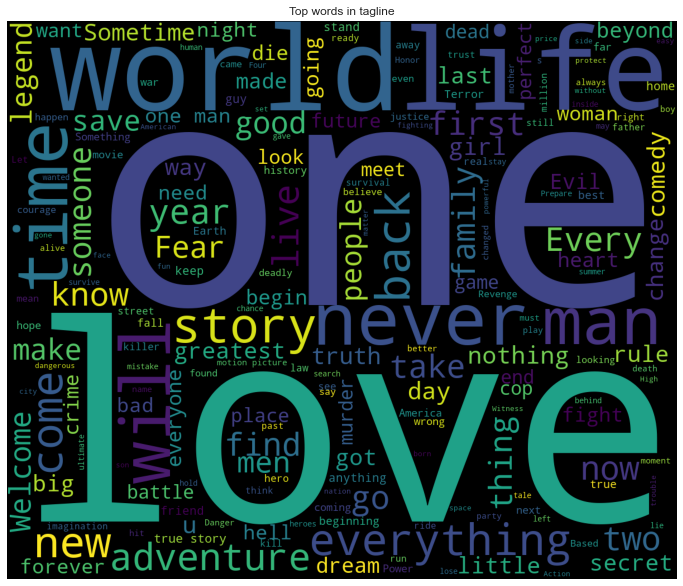

In [99]:
#tagline
plt.figure(figsize=(12,12))
text = ' '.join(train['tagline'].fillna(' ').values)
wordcloud = WordCloud(max_font_size=None, background_color='black',width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

from this figure it's shown most films contais comedy, drama related words title will be dropped not important


In [100]:
train.drop(['title', 'release_date', 'tagline'], axis=1, inplace=True)
test.drop(['title', 'release_date', 'tagline'], axis=1, inplace=True)

In [101]:
train.drop(['Keywords'], axis=1, inplace=True)
test.drop(['Keywords'], axis=1, inplace=True)

In [102]:
#cast
size_of_cast = pd.DataFrame(columns=['size_of_cast'])
train=pd.concat([train, size_of_cast], axis=1)
test=pd.concat([test, size_of_cast], axis=1)

In [103]:
j = 0
for i in train['cast']:
    d = get_dict(i)
    if d != {}:
        train['size_of_cast'][j] = len(d)
    else:
        train['size_of_cast'][j] = np.NaN
    j += 1
    
j = 0
for i in test['cast']:
    d = get_dict(i)
    if d != {}:
        test['size_of_cast'][j] = len(d)
    else:
        test['size_of_cast'][j] = np.NaN
    j += 1

In [104]:
train.drop(['cast'], axis=1, inplace=True)
test.drop(['cast'], axis=1, inplace=True)

In [105]:
train["size_of_cast"].isnull().sum()

627

In [106]:
train['size_of_cast']=train['size_of_cast'].fillna(train['size_of_cast'].mean()).round()
test['size_of_cast']=test['size_of_cast'].fillna(test['size_of_cast'].mean()).round()

In [107]:
#crew
train.drop(['crew'], axis=1, inplace=True)
test.drop(['crew'], axis=1, inplace=True)

In [108]:
train.head()

,id,budget,popularity,runtime,revenue,log_budget,release_year,release_day,release_month,genre_Count,Has_En,num_production_companies,is_use_prediction,number_of_spoken_languages,Status,size_of_cast
0,1,14000000,6.575393,93.0,12314651,16.454568,2015,4,2,0,0,NaN,NaN,NaN,0,24.0
1,2,40000000,8.248895,113.0,95149435,17.504390,2004,4,8,0,0,NaN,NaN,NaN,0,20.0
2,3,3300000,64.299990,105.0,13092000,15.009433,2014,4,10,0,0,NaN,NaN,NaN,0,51.0
3,4,1200000,3.174936,122.0,16000000,13.997833,2012,4,3,0,0,NaN,NaN,NaN,0,7.0
5,6,8000000,0.743274,83.0,3261638,15.894952,1987,3,8,0,0,NaN,NaN,NaN,0,14.0


In [109]:
test.head()

,id,budget,popularity,runtime,log_budget,release_year,release_day,release_month,genre_Count,Has_En,num_production_companies,is_use_prediction,number_of_spoken_languages,Status,size_of_cast
0,3001,7450000,3.851534,93.0,0.000000,2007,5,7,0,0,NaN,NaN,NaN,0,7.0
1,3002,88000,3.559789,113.0,11.385103,1958,6,5,0,0,NaN,NaN,NaN,0,10.0
2,3003,7450000,8.085194,105.0,0.000000,1997,4,5,0,0,NaN,NaN,NaN,0,9.0
3,3004,6800000,8.596012,122.0,15.732433,2010,5,9,0,0,NaN,NaN,NaN,0,23.0
4,3005,2000000,3.217680,NaN,14.508658,2005,4,2,0,0,NaN,NaN,NaN,0,4.0


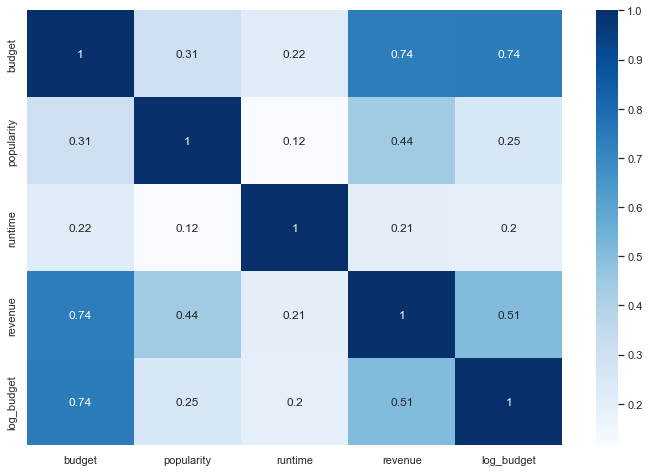

In [110]:
corr =train.corr()
top_feature = corr.index[abs(corr['revenue'])>0.2]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr,cmap='Blues', annot=True)
plt.show()

In [111]:
train.head()

,id,budget,popularity,runtime,revenue,log_budget,release_year,release_day,release_month,genre_Count,Has_En,num_production_companies,is_use_prediction,number_of_spoken_languages,Status,size_of_cast
0,1,14000000,6.575393,93.0,12314651,16.454568,2015,4,2,0,0,NaN,NaN,NaN,0,24.0
1,2,40000000,8.248895,113.0,95149435,17.504390,2004,4,8,0,0,NaN,NaN,NaN,0,20.0
2,3,3300000,64.299990,105.0,13092000,15.009433,2014,4,10,0,0,NaN,NaN,NaN,0,51.0
3,4,1200000,3.174936,122.0,16000000,13.997833,2012,4,3,0,0,NaN,NaN,NaN,0,7.0
5,6,8000000,0.743274,83.0,3261638,15.894952,1987,3,8,0,0,NaN,NaN,NaN,0,14.0


In [112]:
y=train.revenue

In [113]:
features=['log_budget', 'popularity','runtime']
train_x = train[features]

In [114]:
Rf_model = RandomForestRegressor(random_state=1)
Rf_model.fit(train_x,y)
Rf_prediction=Rf_model.predict(train_x)
mean_absolute_error(Rf_prediction,y)

20202943.660097625

In [115]:
r2_score(Rf_prediction, y)

0.9304375285237262

Thank you